<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> <h2 align="center">Logistic Regression: A Sentiment Analysis Case Study</h2>

### Introduction
___

- IMDB movie reviews dataset
- http://ai.stanford.edu/~amaas/data/sentiment
- Contains 25000 positive and 25000 negative reviews
<img src="https://i.imgur.com/lQNnqgi.png" align="center">
- Contains at most reviews per movie
- At least 7 stars out of 10 $\rightarrow$ positive (label = 1)
- At most 4 stars out of 10 $\rightarrow$ negative (label = 0)
- 50/50 train/test split
- Evaluation accuracy

<b>Features: bag of 1-grams with TF-IDF values</b>:
- Extremely sparse feature matrix - close to 97% are zeros

 <b>Model: Logistic regression</b>
- $p(y = 1|x) = \sigma(w^{T}x)$
- Linear classification model
- Can handle sparse data
- Fast to train
- Weights can be interpreted
<img src="https://i.imgur.com/VieM41f.png" align="center" width=500 height=500>

### Task 1: Loading the dataset
---

In [1]:
import pandas as pd

df = pd.read_csv('./movie_data.csv')
df['review'][0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

## <h2 align="center">Bag of words / Bag of N-grams model</h2>

### Task 2: Transforming documents into feature vectors

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

Below, we will call the fit_transform method on CountVectorizer. This will construct the vocabulary of the bag-of-words model and transform the following three sentences into sparse feature vectors:
1. The sun is shining
2. The weather is sweet
3. The sun is shining, the weather is sweet, and one and one is two


In [2]:
'''''' #'The sun is shining'
        #'The weather is sweet'
        # The sun is shining, the weather is sweet, and one and one is two'''''

''

In [3]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs=np.array(['The sun is shining',
               'The weather is sweet',
               'The sun is shining the weather is sweet, and one and one is two'])
#transform the data using the count Vectorizer Method to a bag of words
bag = count.fit_transform(docs)

In [4]:
# Vocabulary for the document is stored in a python dictionary
print(count.vocabulary_)

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [5]:
#feature Matrix Which is Created
#Each Index in the feature matrix corresponds to integer value that are store as dictionary(Vocabulary)
print(bag.toarray())

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


##### Count Vectorizer transform the Document to Bag of Words Model and created a
#### Matrix of Count vectors(Vectors of Term Frequency)

Raw term frequencies: *tf (t,d)*—the number of times a term t occurs in a document *d*

### Task 3: Word relevancy using term frequency-inverse document frequency

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$

$$\text{idf}(t,d) = \text{log}\frac{n_d}{1+\text{df}(d, t)},$$
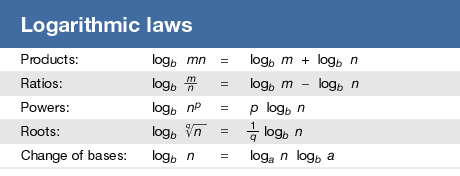

where $n_d$ is the total number of documents, and df(d, t) is the number of documents d that contain the term t. log ensures that low document values are not given too much weight.

##### TFIDF can used to downweight those frequently occuring words in the feature vectors.
##### TFIDF can be calculated as the product of tf and IDF 
##### Yet Using Another Transformer Called TF_IDF (Input:Raw Term Frequency_Count Vectorizer and transform them into tfidf Values )


In [8]:
#use_idf enables inverse document reweighting
#norm=l2 means each output row will have a unit node which is the sum of squares of the vectors element equal to 1.
#Smooth_idf Weights by adding 1 to the document frequency as if an extra document was seen containg every term in the collection exactly once.
#Smooth_idf  It actually prevents divison by zero
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)
tfidf=TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)

In [12]:
#TFIDF MATRIX
print(tfidf.fit_transform(bag).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


The equations for the idf and tf-idf that are implemented in scikit-learn are:

$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$
The tf-idf equation that is implemented in scikit-learn is as follows:

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d)+1)$$

$$v_{\text{norm}} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v_{1}^{2} + v_{2}^{2} + \dots + v_{n}^{2}}} = \frac{v}{\big (\sum_{i=1}^{n} v_{i}^{2}\big)^\frac{1}{2}}$$

### Example:
$$\text{idf}("is", d3) = log \frac{1+3}{1+3} = 0$$
Now in order to calculate the tf-idf, we simply need to add 1 to the inverse document frequency and multiply it by the term frequency:

$$\text{tf-idf}("is",d3)= 3 \times (0+1) = 3$$

### Task 4: Calculate tf-idf of the term *is*:

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

In [14]:
tf_is = 3
n_docs = 3
idf_is = np.log((n_docs+1) / (3+1))
tfidf_is = tf_is * (idf_is + 1)
print('tf-idf of term "is" = %.2f' % tfidf_is)

tf-idf of term "is" = 3.00


$$\text{tfi-df}_{norm} = \frac{[3.39, 3.0, 3.39, 1.29, 1.29, 1.29, 2.0 , 1.69, 1.29]}{\sqrt{[3.39^2, 3.0^2, 3.39^2, 1.29^2, 1.29^2, 1.29^2, 2.0^2 , 1.69^2, 1.29^2]}}$$$$=[0.5, 0.45, 0.5, 0.19, 0.19, 0.19, 0.3, 0.25, 0.19]$$$$\Rightarrow \text{tfi-df}_{norm}("is", d3) = 0.45$$

In [15]:
tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
raw_tfidf = tfidf.fit_transform(count.fit_transform(docs)).toarray()[-1]
raw_tfidf

array([3.39, 3.  , 3.39, 1.29, 1.29, 1.29, 2.  , 1.69, 1.29])

In [16]:
l2_tfidf = raw_tfidf / np.sqrt(np.sum(raw_tfidf**2))
l2_tfidf

array([0.5 , 0.45, 0.5 , 0.19, 0.19, 0.19, 0.3 , 0.25, 0.19])

### Task 5:Data Preparation

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

In [20]:
df.loc[0,'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [21]:
import re
def preprocessor(text):
    #stripping Away HTML Tags and Replacing with empty string
    text = re.sub('<[^>]*>', '', text)
    #Searching For Text Emoji's 
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    #Moving Emoji's to the end of review text
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [22]:
#Stripping Away HTML TAGS
preprocessor(df.loc[0,'review'][-50:])

'is seven title brazil not available'

In [24]:
#Emoji's to end test
preprocessor(":) & MY TEST :( ")

' my test :) :('

In [25]:
#Applying a function on a panda's SERIES
df['review'] =df['review'].apply(preprocessor)

### Task 6: Tokenization of documents

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

### In this task we will learn how to represent our data as collection of words or tokenz.
### Also Perform Word Level Preprocessing Task such as dummy 

In [27]:
# We will use technique called steming to reduce the inflactional forms or derivationally related forms of words to a base form. 
# DEMOCRY,DEMOCRATE.....
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

In [28]:
#Tokenize the words and simply just split the words according to occurence of a space.
def tokenizer(text):
    #Returns Tokens
    return text.split()

In [29]:
# Using Stemming On the Tokenize Data
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [31]:
tokenizer('Runners like Running and thus they run')

['Runners', 'like', 'Running', 'and', 'thus', 'they', 'run']

In [34]:
tokenizer_porter('Runners like Running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

In [35]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
[w for w in tokenizer_porter('Runners like Running and thus they run')[-10:] if w not in stop]

['runner', 'like', 'run', 'thu', 'run']

## Task TransForm Text Data into TF-IDF Vectors

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(strip_accents=None,
                      lowercase=False,
                      preprocessor=None,
                      tokenizer=tokenizer_porter,
                      use_idf=True,
                      norm='l2',
                      smooth_idf=True)
y=df.sentiment.values
X=tfidf.fit_transform(df.review)

In [45]:
df.head()

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


### Task 7: Document classification via a logistic regression model

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.5,shuffle=False)

In [58]:
import pickle
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(
    cv=5,
    scoring='accuracy',
    random_state=0,
    #Number of CPU cores used during the cross-validation loop
    n_jobs=-1,
    #look at the out put as the model gets along
    verbose=3,
    #Maximum number of iterations of the optimization algorithm.
    max_iter=300).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


In [59]:
saved_model=open('saved_model.sav','wb')
pickle.dump(clf, saved_model)
saved_model.close()

### Task 8: Load saved model from disk

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

In [ ]:
import pickle

In [61]:
filename = 'saved_model.sav'
saved_clf = pickle.load(open(filename, 'rb'))

### Task 9: Model accuracy

___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
___

In [62]:
print(saved_clf)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=300, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=0, refit=True, scoring='accuracy',
                     solver='lbfgs', tol=0.0001, verbose=3)


In [72]:
saved_clf.predict(X_test[:,:])

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [74]:
saved_clf.score(X_test, y_test)

C:\Users\khana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2257: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.89608